In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
%cd /content/drive/MyDrive/CV++/data

/content/drive/MyDrive/CV++/data


In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
%cd C:/Users/Admin/OneDrive - Trường ĐH CNTT - University of Information Technology/Máy tính/CS331/CS331/data

C:\Users\Admin\OneDrive - Trường ĐH CNTT - University of Information Technology\Máy tính\CS331\CS331\data


In [3]:
print('Train: {}'.format(len(os.listdir('train/images'))))
print('Val: {}'.format(len(os.listdir('valid/images'))))
print('Test: {}'.format(len(os.listdir('test/images'))))

Train: 2385
Val: 680
Test: 347


In [6]:
def thong_ke(path):
    count = 0
    bien_do = 0
    bien_ngoai_giao = 0
    bien_trang = 0
    bien_vang = 0
    bien_xanh = 0
    for i in os.listdir(path):
        if i.endswith('.txt'):
            count += 1
            f = open(path + '/' + i, "r")
            content = f.read()
            lst = content.split('\n')
            for i in lst:
                temp = i.split()
                if len(temp) == 0:
                    continue
                if temp[0] == '0':
                    bien_do += 1
                elif temp[0] == '1':
                    bien_ngoai_giao += 1
                elif temp[0] == '2':
                    bien_trang += 1
                elif temp[0] == '3':
                    bien_vang += 1
                else:
                    bien_xanh += 1
            f.close()

    print('Number of image: ', count)
    return bien_do, bien_ngoai_giao, bien_trang, bien_vang, bien_xanh 

In [7]:
bien_do_train, bien_ngoai_giao_train, bien_trang_train, bien_vang_train, bien_xanh_train = thong_ke('train/labels') 

print(f'Bien do: {bien_do_train}')
print(f'Bien ngoai giao : {bien_ngoai_giao_train}')
print(f'Bien trang: {bien_trang_train}')
print(f'Bien vang: {bien_vang_train}')
print(f'Bien xanh: {bien_xanh_train}')

Number of image:  2385
Bien do: 439
Bien ngoai giao : 134
Bien trang: 1578
Bien vang: 663
Bien xanh: 240


In [8]:
bien_do_valid, bien_ngoai_giao_valid, bien_trang_valid, bien_vang_valid, bien_xanh_valid = thong_ke('test/labels') 

print(f'Bien do: {bien_do_valid}')
print(f'Bien ngoai giao : {bien_ngoai_giao_valid}')
print(f'Bien trang: {bien_trang_valid}')
print(f'Bien vang: {bien_vang_valid}')
print(f'Bien xanh: {bien_xanh_valid}')

Number of image:  347
Bien do: 69
Bien ngoai giao : 11
Bien trang: 233
Bien vang: 88
Bien xanh: 35


In [9]:
bien_do_test, bien_ngoai_giao_test, bien_trang_test, bien_vang_test, bien_xanh_test = thong_ke('valid/labels') 

print(f'Bien do: {bien_do_test}')
print(f'Bien ngoai giao : {bien_ngoai_giao_test}')
print(f'Bien trang: {bien_trang_test}')
print(f'Bien vang: {bien_vang_test}')
print(f'Bien xanh: {bien_xanh_test}')

Number of image:  680
Bien do: 120
Bien ngoai giao : 37
Bien trang: 453
Bien vang: 198
Bien xanh: 61


In [14]:
bien_trang=bien_trang_train+bien_trang_test+bien_trang_valid
bien_xanh=bien_xanh_train+bien_xanh_test+bien_xanh_valid
bien_do=bien_do_train+bien_do_test+bien_do_valid
bien_vang=bien_vang_train+bien_vang_test+bien_vang_valid
bien_ngoai_giao=bien_ngoai_giao_train+bien_ngoai_giao_test+bien_ngoai_giao_valid

In [22]:
def plotdata(bien_trang,bien_vang,bien_xanh,bien_do,bien_ngoai_giao,x):
    dictt = {'Bien trang': bien_trang, 
              'Bien vang' : bien_vang,
              'Bien xanh': bien_xanh,
              'Bien do' : bien_do, 
              'Bien ngoai giao' : bien_ngoai_giao}
    plt.barh(list(dictt.keys()), dictt.values(), height=0.3)
    plt.xlabel('Số lượng')
    plt.ylabel('Loại biển số')
    plt.title(f'Phân bố các loại biển số trong tập {x}')
    plt.tight_layout()
    plt.show()

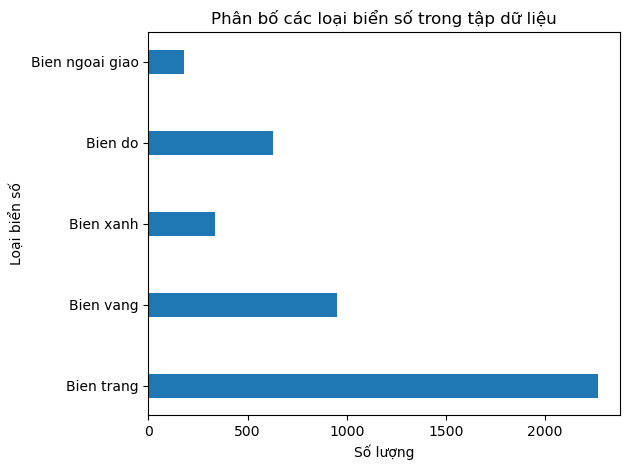

In [23]:
plotdata(bien_trang,bien_vang,bien_xanh,bien_do,bien_ngoai_giao,'dữ liệu')

Number of image:  2385


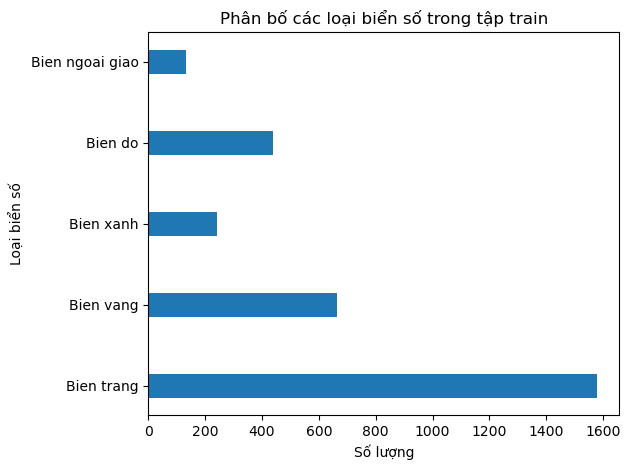

Number of image:  347


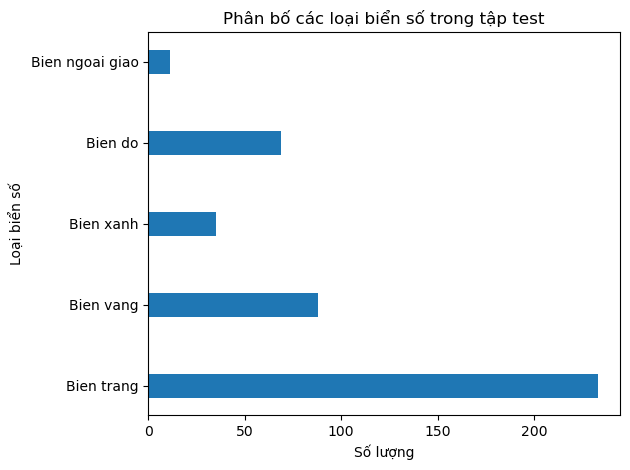

Number of image:  680


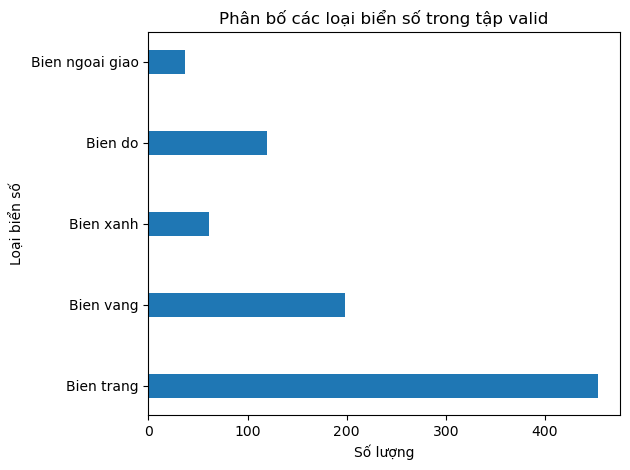

In [28]:
for x in ['train','test','valid']:
    bien_do, bien_ngoai_giao, bien_trang, bien_vang, bien_xanh = thong_ke(f'{x}/labels') 
    plotdata(bien_trang,bien_vang,bien_xanh,bien_do,bien_ngoai_giao,x)